# Create dataset of face images

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
#default_exp nb_02a

In [3]:
from fastai.core import *
from fastai.vision import *
from kgl_deepfake.nb_00 import *
from kgl_deepfake.nb_01a import *
from facenet_pytorch import MTCNN
from nbdev.export import *
from IPython.display import HTML

In [4]:
SOURCE = Path('../data/train_sample_videos/')

In [5]:
f = get_files(SOURCE, extensions=['.json'])[0]
annots = pd.read_json(f).T

In [6]:
annots['fname'] = pd.Series(annots.index).apply(lambda o: SOURCE/o).values

In [7]:
annots.head()

,label,split,original,fname
aagfhgtpmv.mp4,FAKE,train,vudstovrck.mp4,../data/train_sample_videos/aagfhgtpmv.mp4
aapnvogymq.mp4,FAKE,train,jdubbvfswz.mp4,../data/train_sample_videos/aapnvogymq.mp4
abarnvbtwb.mp4,REAL,train,None,../data/train_sample_videos/abarnvbtwb.mp4
abofeumbvv.mp4,FAKE,train,atvmxvwyns.mp4,../data/train_sample_videos/abofeumbvv.mp4
abqwwspghj.mp4,FAKE,train,qzimuostzz.mp4,../data/train_sample_videos/abqwwspghj.mp4


In [8]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
detector = MTCNN(device=device, post_process=False)

In [18]:
! nvidia-smi

Tue Jan 21 10:58:04 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.87.01    Driver Version: 418.87.01    CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P0    34W / 250W |  13205MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [10]:
facepipe = DetectionPipeline(detector, batch_size=60, resize=1/2)

In [11]:
DIR_FACE = Path('../data/train_sample_faces/')

In [12]:
# A face cannot be detected in some of the frames of this video, ~59
#i = 3
#r = annots.iloc[i]
#faces = facepipe(str(r.fname))
#faces.shape

In [15]:
for i in progress_bar(range(annots.shape[0])):
    r = annots.iloc[i]
    faces = facepipe(str(r.fname), label=r.label, save_dir=DIR_FACE)

In [16]:
del detector
torch.cuda.empty_cache()

NameError: name 'detector' is not defined

In [17]:
! du -hs {DIR_FACE}

8.4G	../data/train_sample_faces


In [20]:
number_of_10_videos = annots.shape[0] / 10

In [21]:
number_of_10_videos * 1.5

60.0

In [22]:
number_of_10_videos * .219

8.76

In [19]:
get_image_files(DIR_FACE)[:3]

[PosixPath('../data/train_sample_faces/bwuwstvsbw_049_FAKE.png'),
 PosixPath('../data/train_sample_faces/awhmfnnjih_259_FAKE.png'),
 PosixPath('../data/train_sample_faces/dbtbbhakdv_269_REAL.png')]

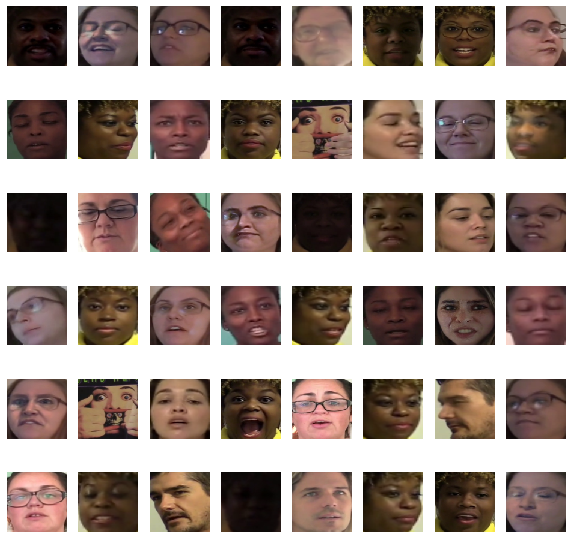

In [24]:
imgs = (open_image(o) for o in get_image_files(DIR_FACE))
def _func(i, j): return next(imgs)
show_multi(_func, 6, 8, figsize=(10, 10))

In [25]:
len(get_image_files(DIR_FACE))

114825

0

# -fin